In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\LENOVO\Downloads\archive\PS_20174392719_1491204439457_log.csv')

# First look
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Shape: (6362620, 11)

Columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

First 5 rows:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [16]:
# Check fraud distribution
print("Fraud Distribution:")
print(df['isFraud'].value_counts())
print("\nFraud Percentage:")
print(df['isFraud'].value_counts(normalize=True)*100)

# Check transaction types
print("\nTransaction Types:")
print(df['type'].value_counts())

Fraud Distribution:
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Fraud Percentage:
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64

Transaction Types:
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [18]:
# Which transaction types have fraud?
fraud_by_type = df.groupby('type')['isFraud'].sum().sort_values(ascending=False)
print("Fraud by Transaction Type:")
print(fraud_by_type)

# Fraud rate by type
fraud_rate = df.groupby('type')['isFraud'].mean()*100
print("\nFraud Rate % by Type:")
print(fraud_rate.sort_values(ascending=False))

Fraud by Transaction Type:
type
CASH_OUT    4116
TRANSFER    4097
CASH_IN        0
DEBIT          0
PAYMENT        0
Name: isFraud, dtype: int64

Fraud Rate % by Type:
type
TRANSFER    0.768799
CASH_OUT    0.183955
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


Average transaction amount:
             count          mean           std   min         25%        50%  \
isFraud                                                                       
0        6354407.0  1.781970e+05  5.962370e+05  0.01   13368.395   74684.72   
1           8213.0  1.467967e+06  2.404253e+06  0.00  127091.330  441423.44   

                75%          max  
isFraud                           
0         208364.76  92445516.64  
1        1517771.48  10000000.00  


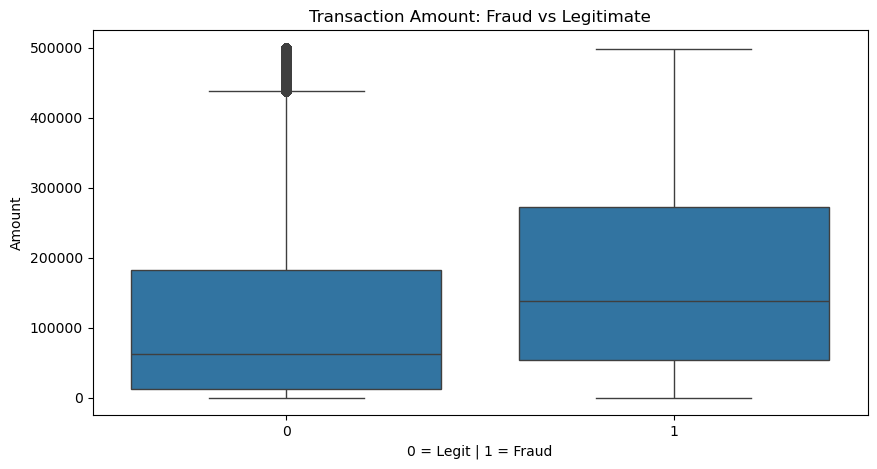

In [20]:
# Compare fraud vs legit transaction amounts
print("Average transaction amount:")
print(df.groupby('isFraud')['amount'].describe())

# Visualize it
plt.figure(figsize=(10,5))
sns.boxplot(x='isFraud', y='amount', data=df[df['amount'] < 500000])
plt.title('Transaction Amount: Fraud vs Legitimate')
plt.xlabel('0 = Legit | 1 = Fraud')
plt.ylabel('Amount')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1128\641830532.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=fraud_only, palette='Reds_r')


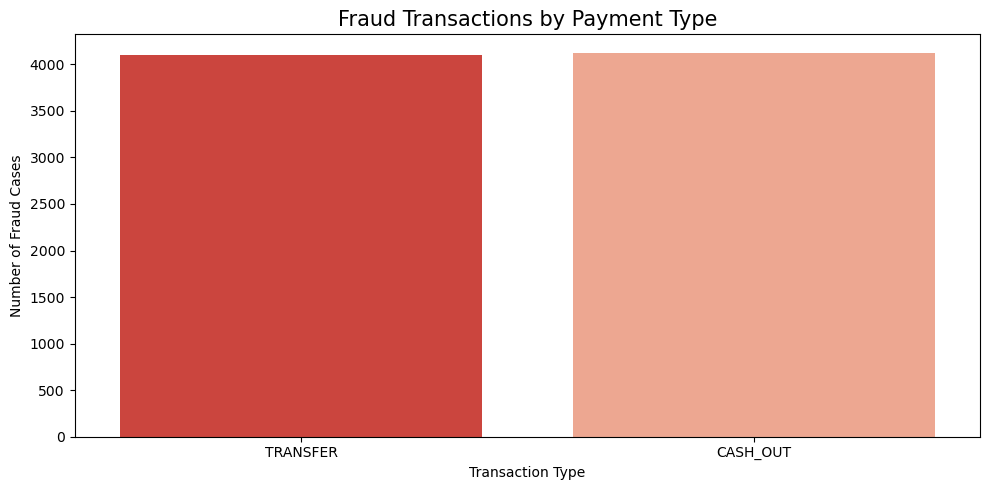

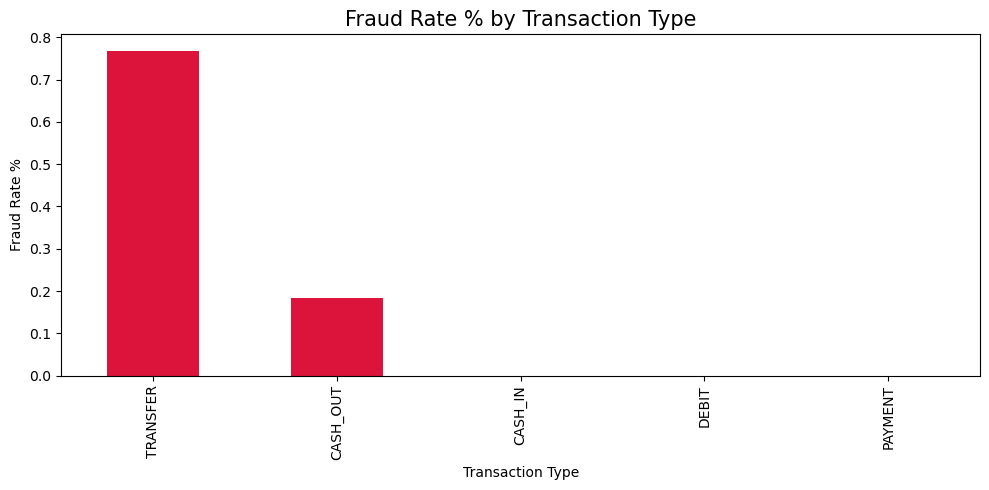

In [26]:
# Fraud count by type - Bar chart
plt.figure(figsize=(10,5))
fraud_only = df[df['isFraud']==1]

sns.countplot(x='type', data=fraud_only, palette='Reds_r')
plt.title('Fraud Transactions by Payment Type', fontsize=15)
plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraud Cases')
plt.tight_layout()
plt.show()

# Fraud rate by type - Bar chart  
plt.figure(figsize=(10,5))
fraud_rate.sort_values(ascending=False).plot(kind='bar', color='crimson')
plt.title('Fraud Rate % by Transaction Type', fontsize=15)
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate %')
plt.tight_layout()
plt.show()

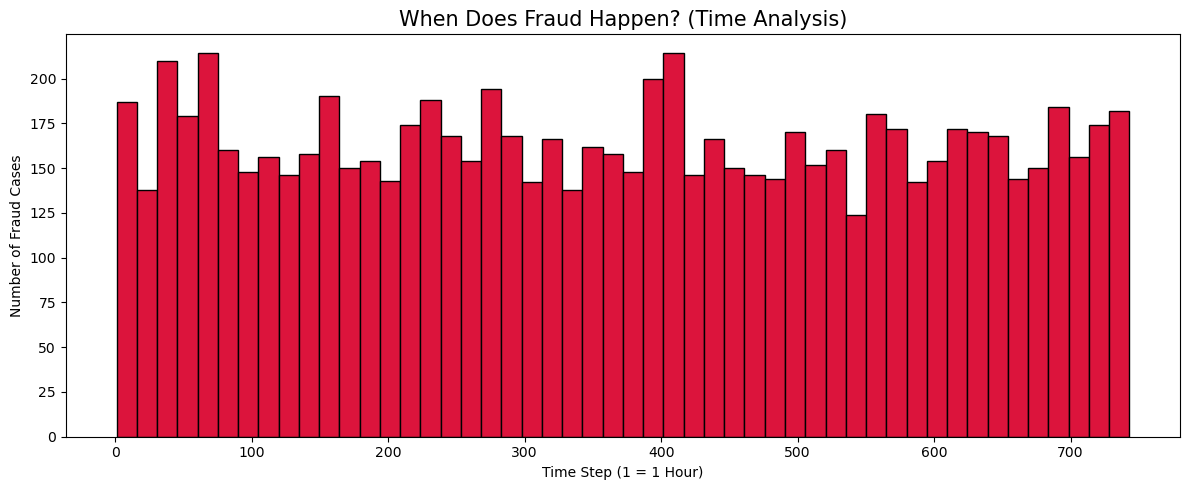

Fraud peaks at step: 212
That means hour: 212 of the simulation


In [28]:
# When does fraud happen? (by hour/step)
plt.figure(figsize=(12,5))
df[df['isFraud']==1]['step'].plot(kind='hist', bins=50, color='crimson', edgecolor='black')
plt.title('When Does Fraud Happen? (Time Analysis)', fontsize=15)
plt.xlabel('Time Step (1 = 1 Hour)')
plt.ylabel('Number of Fraud Cases')
plt.tight_layout()
plt.show()

print("Fraud peaks at step:", df[df['isFraud']==1]['step'].mode()[0])
print("That means hour:", df[df['isFraud']==1]['step'].mode()[0], "of the simulation")

Accounts completely drained after fraud:
balance_drained
1    8053
0     160
Name: count, dtype: int64

98.05% of fraud victims had their account completely drained!


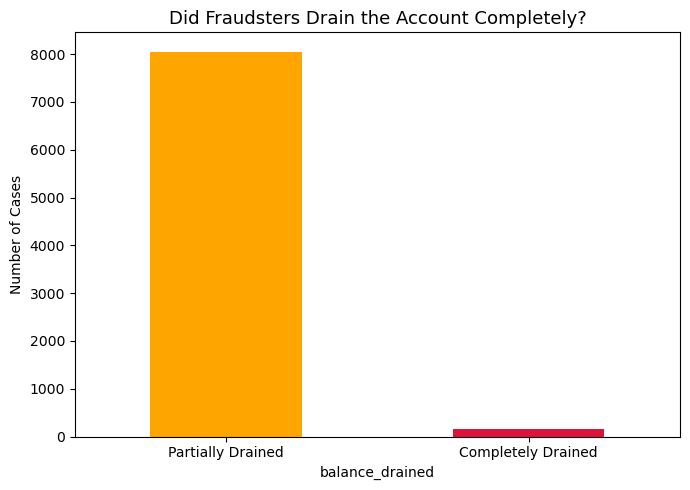

In [30]:
# Do fraudsters drain accounts completely?
fraud_df = df[df['isFraud']==1].copy()

# Check if balance becomes zero after fraud
fraud_df['balance_drained'] = (fraud_df['newbalanceOrig'] == 0).astype(int)

print("Accounts completely drained after fraud:")
print(fraud_df['balance_drained'].value_counts())
print(f"\n{fraud_df['balance_drained'].mean()*100:.2f}% of fraud victims had their account completely drained!")

# Visualize
plt.figure(figsize=(7,5))
fraud_df['balance_drained'].value_counts().plot(kind='bar', color=['orange','crimson'])
plt.title('Did Fraudsters Drain the Account Completely?', fontsize=13)
plt.xticks([0,1], ['Partially Drained', 'Completely Drained'], rotation=0)
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()

Fraud by Amount Range:
amount_range
<1L        1691
1L-5L      2642
5L-10L     1158
10L-50L    1962
50L+        744
Name: count, dtype: int64


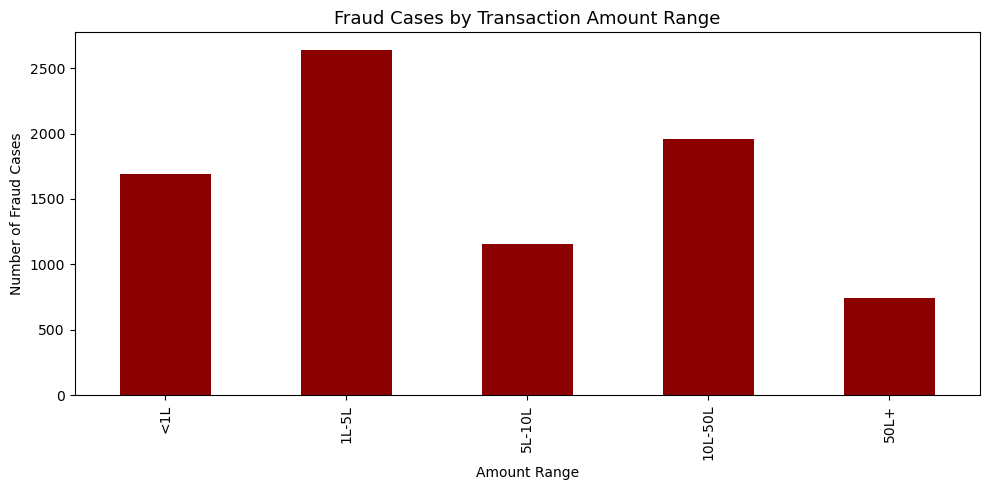

In [32]:
# Top fraud amount ranges
fraud_df['amount_range'] = pd.cut(fraud_df['amount'], 
                            bins=[0,100000,500000,1000000,5000000,10000000],
                            labels=['<1L','1L-5L','5L-10L','10L-50L','50L+'])

print("Fraud by Amount Range:")
print(fraud_df['amount_range'].value_counts().sort_index())

plt.figure(figsize=(10,5))
fraud_df['amount_range'].value_counts().sort_index().plot(kind='bar', color='darkred')
plt.title('Fraud Cases by Transaction Amount Range', fontsize=13)
plt.xlabel('Amount Range')
plt.ylabel('Number of Fraud Cases')
plt.tight_layout()
plt.show()

In [34]:
# Export fraud data for Power BI
fraud_summary = df.groupby(['type', 'isFraud']).agg(
    total_transactions=('amount', 'count'),
    total_amount=('amount', 'sum'),
    avg_amount=('amount', 'mean')
).reset_index()

# Export files
fraud_summary.to_csv('fraud_summary.csv', index=False)
df[df['isFraud']==1].to_csv('fraud_only.csv', index=False)
df.sample(50000).to_csv('sample_data.csv', index=False)  # Sample for Power BI

print("✅ Files exported successfully!")
print("1. fraud_summary.csv")
print("2. fraud_only.csv") 
print("3. sample_data.csv")

✅ Files exported successfully!
1. fraud_summary.csv
2. fraud_only.csv
3. sample_data.csv


In [36]:
import os
print("Your files are saved here:")
print(os.getcwd())

Your files are saved here:
C:\Users\LENOVO


In [38]:
import os
files = ['fraud_summary.csv', 'fraud_only.csv', 'sample_data.csv']
for f in files:
    if os.path.exists(f):
        print(f"✅ {f} EXISTS")
    else:
        print(f"❌ {f} NOT FOUND")

✅ fraud_summary.csv EXISTS
✅ fraud_only.csv EXISTS
✅ sample_data.csv EXISTS
